In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

$$
v = \frac {s} {t}
$$

$$
\alpha = \omega t
$$

In [39]:
FULL_ANGLE = math.radians(360)

In [40]:
EARTH_RADIUS = 6738*1000 #  Radius in [m]

SERVER_PERIOD = 92.68*60 #  Period of server in seconds LEO
SERVER_ALTITUDE = 422*1000 + EARTH_RADIUS #  Altitude in [m]
SERVER_ANGULAR_VELOCITY = FULL_ANGLE/SERVER_PERIOD

SATELLITE_PERIOD = 12*60*60 #  Period of MEO satellite in seconds
SATELLITE_ALTITUDE = 35786*1000 + EARTH_RADIUS #  Altitude in [m]
SATELLITE_ANGULAR_VELOCITY = FULL_ANGLE/SATELLITE_PERIOD

DAY_DURATION = 24*60*60 #  Length of one day in seconds
GROUND_ANGULAR_VELOCITY = FULL_ANGLE/DAY_DURATION

SERVERS_QUANTITY = 2
PROCESSING_TIME = 60 #  [s]

In [41]:
get_satellite_position = lambda t: (SATELLITE_ANGULAR_VELOCITY*t) % FULL_ANGLE
get_ground_position = lambda t: (GROUND_ANGULAR_VELOCITY*t) % FULL_ANGLE

def get_server_position(t: int, n: int = 1):
    starting_angle = (math.pi/SERVERS_QUANTITY)*n
    return (SERVER_ANGULAR_VELOCITY*t + starting_angle) % FULL_ANGLE

In [42]:
satellite = []
server = []
ground = []

TIME = range(0, 48*60*60, 60)

for i in TIME:
    satellite.append(get_satellite_position(i))
    server.append(get_server_position(i))
    ground.append(get_ground_position(i))

<AxesSubplot:>

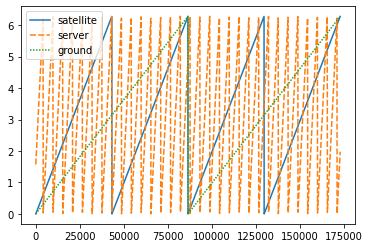

In [43]:
d = {
    'satellite': satellite,
    'server': server,
    'ground': ground
}
df = pd.DataFrame(data=d, index=TIME)
sns.lineplot(data=df)

In [44]:
df.tail()

,satellite,server,ground
172500,6.239552,1.700962,6.261369
172560,6.248279,1.768756,6.265732
172620,6.257005,1.836550,6.270095
172680,6.265732,1.904345,6.274459
172740,6.274459,1.972139,6.278822


In [45]:
df['x_satellite'] = SATELLITE_ALTITUDE*np.sin((2*math.pi*df['satellite'])/FULL_ANGLE)
df['y_satellite'] = SATELLITE_ALTITUDE*np.cos((2*math.pi*df['satellite'])/FULL_ANGLE)

df['x_ground'] = EARTH_RADIUS*np.sin((2*math.pi*df['ground'])/FULL_ANGLE)
df['y_ground'] = EARTH_RADIUS*np.cos((2*math.pi*df['ground'])/FULL_ANGLE)

df['x_server'] = SERVER_ALTITUDE*np.sin((2*math.pi*df['server'])/FULL_ANGLE)
df['y_server'] = SERVER_ALTITUDE*np.cos((2*math.pi*df['server'])/FULL_ANGLE)

<function matplotlib.pyplot.show(close=None, block=None)>

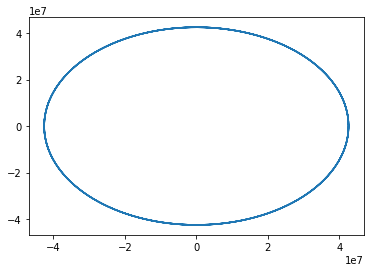

In [46]:
plt.plot(df['x_satellite'], df['y_satellite'])
plt.show

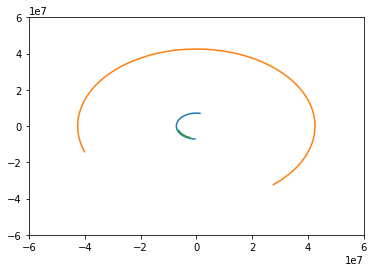

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from itertools import count
from IPython import display

x_server = []
y_server = []

x_satellite = []
y_satellite = []

x_ground = []
y_ground = []

def animate1(j):
    global x_server, y_server, x_satellite, y_satellite, x_ground, y_ground
    
    if j % 50 == 1:        
        x_server = []
        y_server = []
        
    if j% 200 == 1:
        x_ground = []
        y_ground = []
        
    if j % 500 == 1:
        x_satellite = []
        y_satellite = []
        
    x_server.append(df.iloc[j]['x_server'])
    y_server.append(df.iloc[j]['y_server'])
    
    x_satellite.append(df.iloc[j]['x_satellite'])
    y_satellite.append(df.iloc[j]['y_satellite'])
    
    
    x_ground.append(df.iloc[j]['x_ground'])
    y_ground.append(df.iloc[j]['y_ground'])
    
    plt.cla()
    plt.plot(x_server, y_server)
    plt.plot(x_satellite, y_satellite)
    plt.plot(x_ground, y_ground)
    plt.rcParams["figure.autolayout"] = True
    plt.xlim([-60000000, 60000000])
    plt.ylim([-60000000, 60000000])
    
    

animation_2 = animation.FuncAnimation(plt.gcf(),animate1,interval=50, frames=1000)
video_2 = animation_2.to_html5_video()
html_code_2 = display.HTML(video_2)
display.display(html_code_2)

In [2]:
point(0,0,0)

NameError: name 'point' is not defined

In [ ]:
https://bceagan.medium.com/python-n-body-orbit-simulation-be3fb6356579